In [6]:
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 3.0 MB/s  0:00:02 eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 3.0 MB/s  0:00:003.1 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 3.0 MB/s  0:00:013.0 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib] 6/7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [25]:
%pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 3.1 MB/s  0:00:03m 3.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [seaborn]━━━ 1/3 [pandas]
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
%matplotlib inline

In [ ]:
# X= Image
# y= value

In [4]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [5]:
print( len(X_train) )
print( len(y_test) )

60000
10000


In [6]:
X_train.shape   # o/p-> 60000 img with 28x28 pixels

(60000, 28, 28)

In [7]:
X_train[0]  #each image is of 28x28 pixels so all the 28 rows will be in output with each row having 28 values

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
# Standardizing and Scaling
X_train=X_train/255
X_test=X_test/255

5


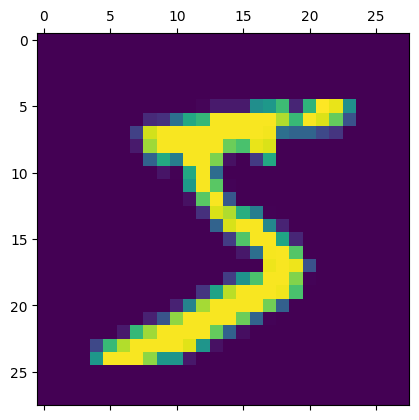

In [9]:
plt.matshow(X_train[0])  #Shows us the first image of the 2-D matrix
print(y_train[0])

In [10]:
#Flatteing 2D array to 1D array
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_train_flattened.shape

(60000, 784)

In [11]:
X_test_flattened.shape

(10000, 784)

In [12]:
#Sequential means: layers are stacked one after another,output of one layer becomes input of the next layer
#Dense-> every input is connected to every neuron
#Compile-> Setting rules for learning
#optimizer-> How the model learns
#optimizer='adams'->Adams is a smart optimizer. The model updates itself little by little after making errors
#loss-> How wrong it is
#sparse_categorical_crossentropy-> measures how wrong the model is when choosing one number (0–9)
#accuracy-> How correct it is 
#epochs-> how many times it learn from the training data

# keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
    # Dense = fully connected layer
    # 10 = number of output neurons (digits 0–9)
    # input_shape=(784,) = 28x28 image flattened into 784 values
    # activation='sigmoid' squashes output between 0 and 1
# sparse  -> labels are plain numbers (0,1,2,...9)
# categorical -> means the model is choosing one option out of many possible classes
# crossentropy -> measures how wrong the prediction is,calculates the penalty for being wrong

In [15]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',       # optimizer decides HOW the model updates its weights. adam is a smart and commonly used optimizer
    loss='sparse_categorical_crossentropy', #loss measures HOW WRONG the model’s prediction is.Used when output classes are 0–9 & labels->no.
    metrics=['accuracy']  # metric tells us HOW GOOD the model is doing. accuracy = percentage of correct predictions
)

model.fit(X_train_flattened,y_train,epochs=5)  #o/p-> 92.56%

Epoch 1/5
1875/1875 [==============================] - 0s 223us/step - loss: 0.4705 - accuracy: 0.8764
Epoch 2/5
1875/1875 [==============================] - 0s 240us/step - loss: 0.3037 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 0s 222us/step - loss: 0.2834 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 0s 221us/step - loss: 0.2732 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 0s 221us/step - loss: 0.2669 - accuracy: 0.9256


In [16]:
#Evaluating the model on the test data
model.evaluate(X_test_flattened,y_test)  # ACCURACY-> 92.54%

313/313 [==============================] - 0s 202us/step - loss: 0.2660 - accuracy: 0.9254


[0.2660335600376129, 0.9254000186920166]

In [17]:
y_predicted=model.predict(X_test_flattened)

313/313 [==============================] - 0s 173us/step


In [18]:
# Now testing our model.Let's check if predicted value matches the original value

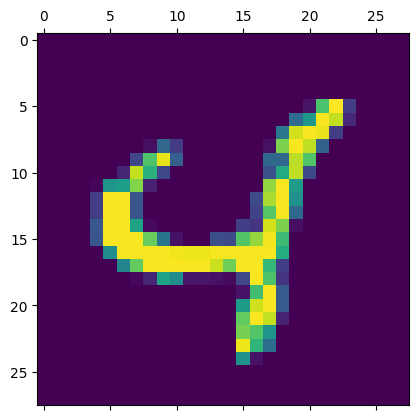

In [19]:
plt.matshow(X_test[67])

In [20]:
y_predicted[67]

array([2.8603606e-02, 8.9879846e-05, 2.6715569e-02, 1.3132060e-04,
       9.9817878e-01, 1.8692190e-03, 2.4857360e-01, 4.6188887e-02,
       1.6448356e-01, 6.0399824e-01], dtype=float32)

In [21]:
#Returning the index of the max value in the array to check the prediction
np.argmax(y_predicted[67])

4

In [22]:
#Building a confusion matrix

In [23]:
# y_predicted contains probability values (not labels) for each test image,
# y_test contains the actual true digit labels,
# so we convert y_predicted into y_predicted_labels by taking the index of the highest probability

y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [24]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    4,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1117,    4,    1,    0,    1,    4,    2,    6,    0],
       [   3,   10,  938,    9,    6,    4,   11,    8,   38,    5],
       [   3,    1,   30,  900,    0,   31,    2,    9,   23,   11],
       [   1,    1,   10,    1,  905,    0,    8,    4,   10,   42],
       [   9,    3,    8,   26,    8,  789,   10,    3,   29,    7],
       [   9,    3,    9,    1,    7,   16,  908,    2,    3,    0],
       [   1,    7,   30,    4,    7,    1,    0,  930,    3,   45],
       [   7,   11,    7,   15,    9,   26,    8,    6,  874,   11],
       [   9,    7,    2,    7,   25,    7,    0,   12,    7,  933]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

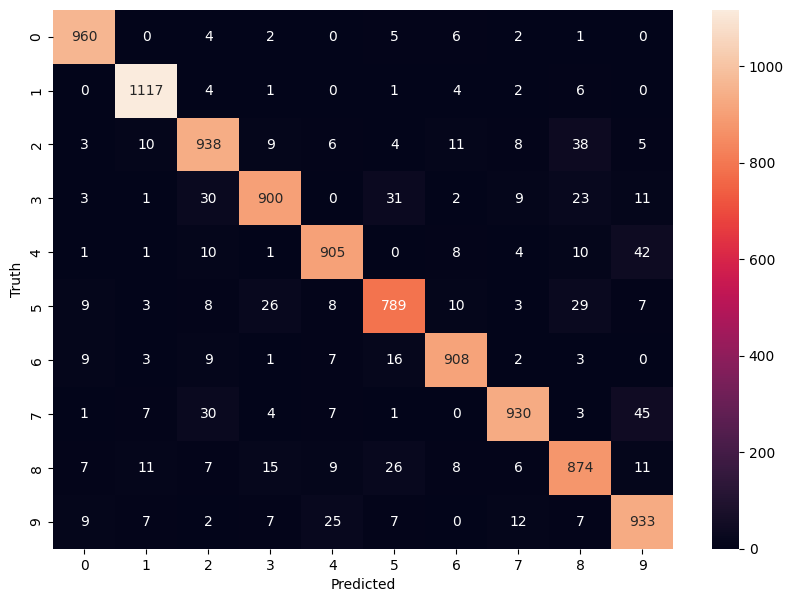

In [26]:
import seaborn as sns
plt.figure(figsize=(10,7))  # Creates a new blank figure that is 10 units wide and 7 units tall.
sns.heatmap(cm,annot=True,fmt='d')  #annot=True means write the numbers inside each box so you can see exact values.
                                    #fmt='d' means display those numbers as integers, not decimals
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
#CONCLUSION: 
# Digits like 0, 1, 6 are learned very well
# Digits like 5, 8, 9 get confused more 

In [28]:
# ADDING A HIDDEN LAYER TO OUR MODEL TO CHECK ITS ACCURACY

In [48]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',       # optimizer decides HOW the model updates its weights. adam is a smart and commonly used optimizer
    loss='sparse_categorical_crossentropy', #loss measures HOW WRONG the model’s prediction is.Used when output classes are 0–9 & labels->no.
    metrics=['accuracy']  # metric tells us HOW GOOD the model is doing. accuracy = percentage of correct predictions
)

model.fit(X_train_flattened,y_train,epochs=5)  #o/p-> 98.32%

Epoch 1/5
1875/1875 [==============================] - 1s 326us/step - loss: 0.2842 - accuracy: 0.9188
Epoch 2/5
1875/1875 [==============================] - 1s 319us/step - loss: 0.1308 - accuracy: 0.9616
Epoch 3/5
1875/1875 [==============================] - 1s 319us/step - loss: 0.0912 - accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 1s 318us/step - loss: 0.0674 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 1s 318us/step - loss: 0.0533 - accuracy: 0.9832


In [49]:
model.evaluate(X_test_flattened,y_test) #ACCURACY-> 97.47

313/313 [==============================] - 0s 243us/step - loss: 0.0794 - accuracy: 0.9747


[0.07935179769992828, 0.9746999740600586]

313/313 [==============================] - 0s 220us/step


Text(95.72222222222221, 0.5, 'Truth')

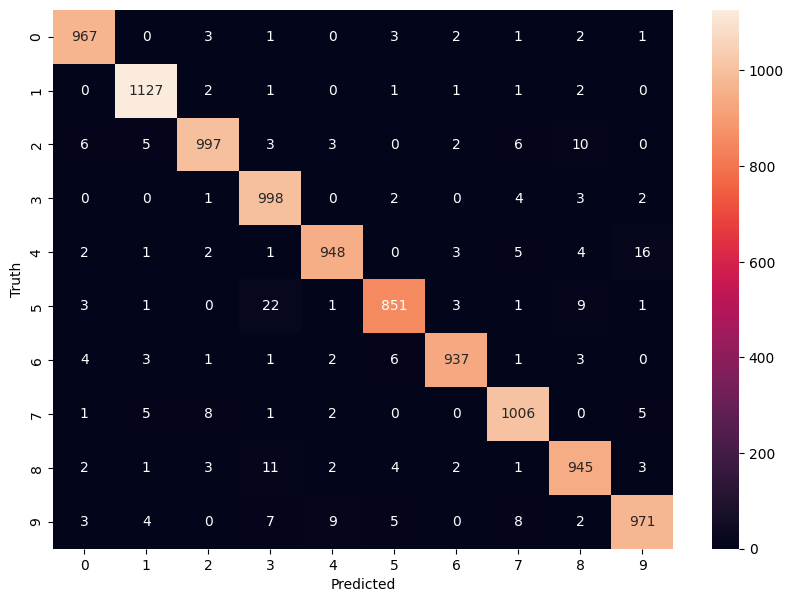

In [50]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

# Build confusion matrix
# y_test = actual (true) labels
# y_predicted_labels = model's predicted labels
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

# Create a figure of size 10x7 for better visibility
plt.figure(figsize=(10,7))

# Draw heatmap of confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [51]:
#CONCLUSION: ADDING A HIDDEN LAYER IMPROVED THE ACCURACY FROM 92.54% TO 97.47%